<a href="https://colab.research.google.com/github/Ghostalp07/britishairways/blob/main/BAbooking_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/customer_booking (1).csv', encoding='latin1')

In [3]:
region_map = {
    'AUS': 'Oceania', 'NZL': 'Oceania',
    'SGP': 'South East Asia', 'MYS': 'South East Asia',
    'USA': 'North America', 'CAN': 'North America',

}
df['booking_origin_region'] = df['booking_origin'].map(region_map).fillna('Unknown')


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

x = df.drop(columns=['booking_complete'])
y = df['booking_complete']


categorical_features = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin', 'booking_origin_region']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough')


x_encoded = preprocessor.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)
randfor = RandomForestClassifier(n_estimators=100, random_state=42)
randfor.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
from sklearn.metrics import classification_report

y_pred = randfor.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.55      0.14      0.22      1480

    accuracy                           0.86     10000
   macro avg       0.71      0.56      0.57     10000
weighted avg       0.82      0.86      0.82     10000



In [19]:
import pandas as pd
import matplotlib.pyplot as plt

importances = randfor.feature_importances_
features = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8, 10))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='gray')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


ValueError: All arrays must be of the same length

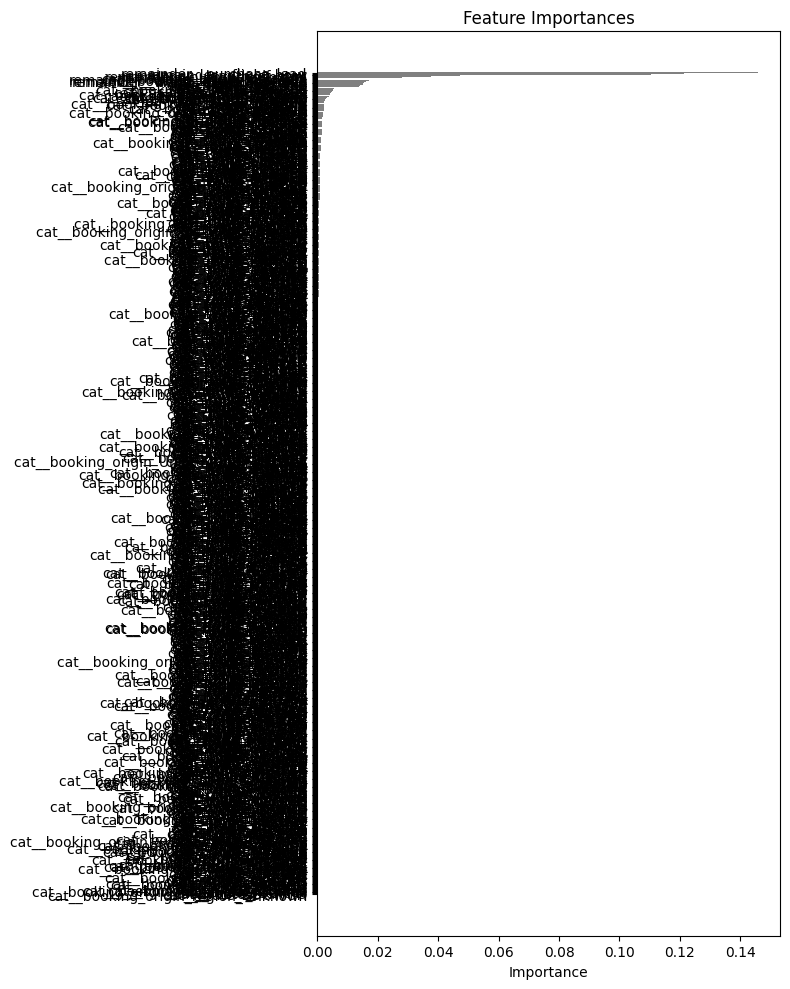

In [20]:
importances = randfor.feature_importances_

feature_names = preprocessor.get_feature_names_out()

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8, 10))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='gray')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()